<a href="https://colab.research.google.com/github/gordana14/Assignment-API/blob/master/colab-gt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [3]:
!wget https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!dpkg -i skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!echo "deb [signed-by=/usr/share/keyrings/skewed-keyring.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

--2024-10-10 11:15:38--  https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_jammy.deb
Resolving downloads.skewed.de (downloads.skewed.de)... 49.12.93.194
Connecting to downloads.skewed.de (downloads.skewed.de)|49.12.93.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23192 (23K) [application/x-debian-package]
Saving to: ‘skewed-keyring_1.0_all_jammy.deb’

skewed-keyring_1.0_ 100%[===================>]  22.65K  --.-KB/s    in 0.1s    

2024-10-10 11:15:39 (224 KB/s) - ‘skewed-keyring_1.0_all_jammy.deb’ saved [23192/23192]

Selecting previously unselected package skewed-keyring.
(Reading database ... 124385 files and directories currently installed.)
Preparing to unpack skewed-keyring_1.0_all_jammy.deb ...
Unpacking skewed-keyring (1.0) ...
Setting up skewed-keyring (1.0) ...
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jam

In [1]:
# Colab uses a Python install that deviates from the system's! Bad colab! We need some workarounds.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'python3-cairo' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils li

# Now we can use graph-tool as any other Python module



In [5]:
from graph_tool.all import *

#g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

ModuleNotFoundError: No module named 'graph_tool'

In [4]:
from google.colab import files
import graph_tool.all as gt
import pandas as pd
import numpy as np
import networkx as nx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  181 non-null    int64 
 1   Key         181 non-null    int64 
 2   Values      181 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


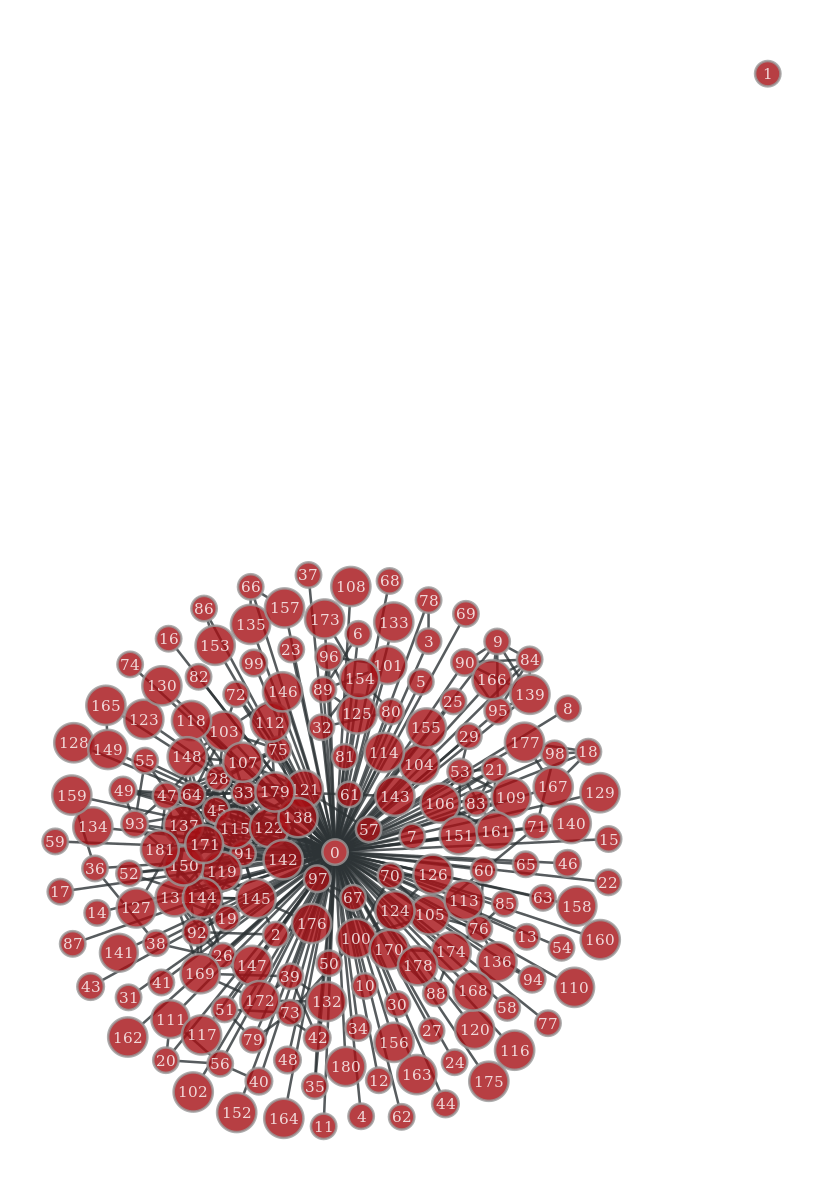

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f53a882e4d0, at 0x7f53ba4161d0>

In [4]:
from google.colab import files
import graph_tool.all as gt
import pandas as pd

df_pairwiseDistanceCSH = pd.read_csv('/content/FileForGoogleColabBlackModeling.csv', header=None)
df_AutLabels = pd.read_csv('/content/AuthorsLables.csv')

df_AutLabels.info()
# 5. Create a graph using graph_tool
g = gt.Graph(directed=False)

# Add vertices
num_vertices = df_pairwiseDistanceCSH.shape[0]
g.add_vertex(num_vertices)

# Add edges where adjacency matrix is non-zero
for i in range(num_vertices):
    for j in range(i+1, num_vertices):  # Assuming undirected graph (only upper triangle)
        if df_pairwiseDistanceCSH.iloc[i, j] >= 0.7:
          g.add_edge(g.vertex(i), g.vertex(j))

# 5. Create vertex property for labels
label_property = g.new_vertex_property("string")

# Assign labels from the DataFrame to the vertices
for i in range(num_vertices-1):
    label_property[g.vertex(i)] = df_AutLabels.iloc[i,2]  # Assuming labels are in the first column

# 6. Visualize the graph
gt.graph_draw(g, vertex_text=g.vertex_index, output_size=(600, 600))

In [56]:

state=gt.minimize_blockmodel_dl(g)
# Get the vertex blocks (group assignments)
blocks = state.get_blocks()

# Create a dictionary to store vertices belonging to the same block
block_groups = {}
for v in g.vertices():
    block = blocks[v]  # Get the block number for the vertex
    if block not in block_groups:
        block_groups[block] = []
    block_groups[block].append(df_AutLabels.iloc[int(v)-1,2])  # Store the vertex in its block

# Print the result
for block, vertices in block_groups.items():
    print(f"Block {block}: {vertices}")

Block 58: ['Andrea Musso', 'Ola A. Abu Ali', 'Sabine Pahl', 'Tamás S. Biró', '√Ålvaro Corral', 'Dániel Kondor', 'Edward D. Lee', 'Jana Lasser', 'Lisette Espín-Noboa', 'Dániel Kondor', 'Anton Pichler', 'Henrik Olsson', 'Rafael Prieto Curiel', 'P.M.A. Sloot', 'Eva Schernhammer', 'Max Pellert', 'Francesca Tria', 'Rudolf Hanel', 'Michael Strauss', 'J. Stephen Lansing', 'Allan Hanbury', 'Giordano De Marzo', 'Carlo C. Jäger', 'Thomas Niederkrotenthaler', 'Bernat Corominas‐Murtra', 'Vito Latora', 'Raissa M. D’Souza', 'Peter M. A. Sloot', 'Hildegard Meyer‐Ortmanns', 'Georg Heiler', 'Márcia Regina Ferreira', 'Yamir Moreno', 'Alessandro Pluchino', 'Jan O. Korbel', 'Tuan Minh Pham', 'Renaud Lambiotte', 'Simon David Lindner', 'Gerald Steiner', 'Tiziana Di Matteo', 'Ljubica Nedelkoska', 'Bosiljka Tadić', 'Nicola Cinardi', 'Beate Conrady', 'Roberta Sinatra', 'Javier D. Fernández', 'Rahim Entezari', 'Liuhuaying Yang', 'Michaela Kaleta', 'Elma Dervić', 'János Kertész', 'Claudia Wagner', 'Matjaž Perc',

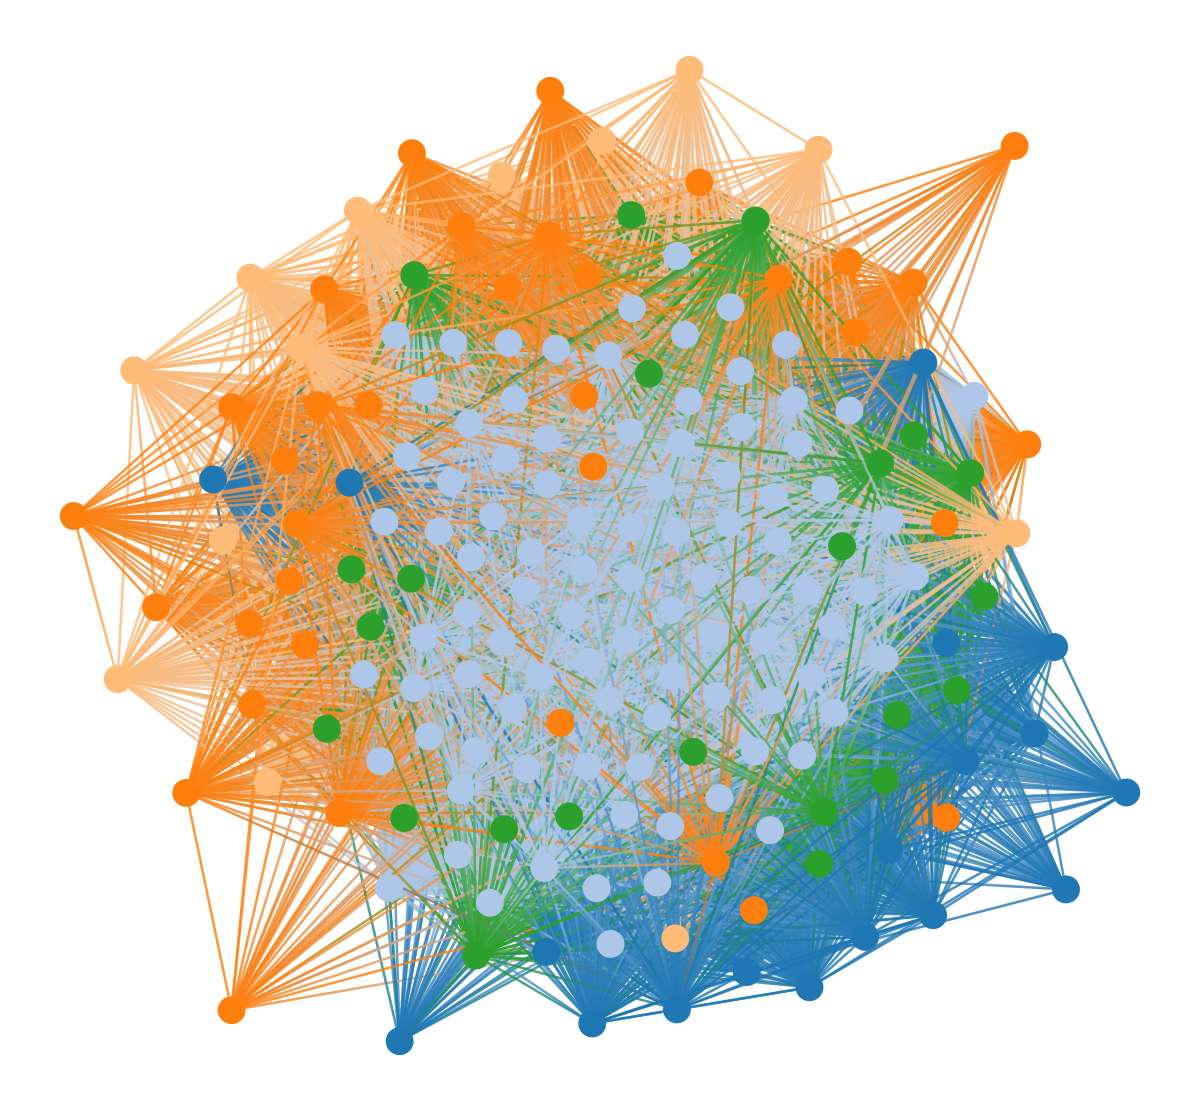

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7b5011d3ef80, at 0x7b4fcc6fff40>

In [57]:
state.draw()

# Inline drawing works too!

In [5]:
state = gt.minimize_nested_blockmodel_dl(g)
lstate = state.levels[0]
blocks = lstate.get_blocks()

# Create a dictionary to store vertices belonging to the same block
block_groups = {}
for v in g.vertices():
    block = blocks[v]  # Get the block number for the vertex
    if block not in block_groups:
        block_groups[block] = []
    block_groups[block].append(df_AutLabels.iloc[int(v)-1,2])  # Store the vertex in its block

# Print the result
for block, vertices in block_groups.items():
    print(f"Block {block}: {vertices}")

Block 1: ['Andrea Musso']
Block 164: ['Ola A. Abu Ali', 'Hyunsik Kong', 'Sabine Pahl', 'Tamás S. Biró', '√Ålvaro Corral', 'Dániel Kondor', 'Wolfgang Knecht', 'Johannes Jaeger', 'Ljubica Nedelkoska', 'Edward D. Lee', 'Sándor Juhász', 'Jana Lasser', 'Lisette Espín-Noboa', 'Dániel Kondor', 'Rafael Prieto Curiel', 'Steve Lansing', 'P.M.A. Sloot', 'Lukas Malik', 'Eva Schernhammer', 'Francesca Tria', 'Michael Strauss', 'J. Stephen Lansing', 'Allan Hanbury', 'Gavrila A. Puspitarani', 'Sara Mesquita', 'Rainer Stütz', 'Carlo C. Jäger', 'Diego Rybski', 'Bernat Corominas‐Murtra', 'Jan Bachmann', 'Daniela Schlager', 'Christoph Reuter', 'Peter M. A. Sloot', 'Henrike Arfsten', 'Erwin Filtz', 'Carlos Molinero', 'Alessandro Pluchino', 'Mihaela Pavličev', 'Sonja J. Prohaska', 'Jan O. Korbel', 'Tuan Minh Pham', 'Andrew K. Ringsmuth', 'Niklas Reisz', 'Stefan Kitzler', 'Simon David Lindner', 'Gerald Steiner', 'Tiziana Di Matteo', 'Frank R. Schmid', 'Beate Conrady', 'Roberta Sinatra', 'Javier D. Fernández'

original    Unnamed: 0         0         1         2         3         4         5  \
0           0  1.000000  0.011533  0.014125  0.036803  0.081014  0.056501   
1           1  0.011533  1.000000  0.408248  0.303911  0.093659  0.306186   

          6         7         8  ...       171       172      173      174  \
0  0.070908  0.008155  0.046133  ...  0.066132  0.027663  0.04606  0.15759   
1  0.243975  0.235702  0.333333  ...  0.477839  0.430515  0.23152  0.00000   

        175       176       177       178       179       180  
0  0.081014  0.088242  0.184997  0.120031  0.011533  0.014125  
1  0.842927  0.000000  0.297044  0.212398  0.333333  0.408248  

[2 rows x 182 columns]
Shape (18, 18)


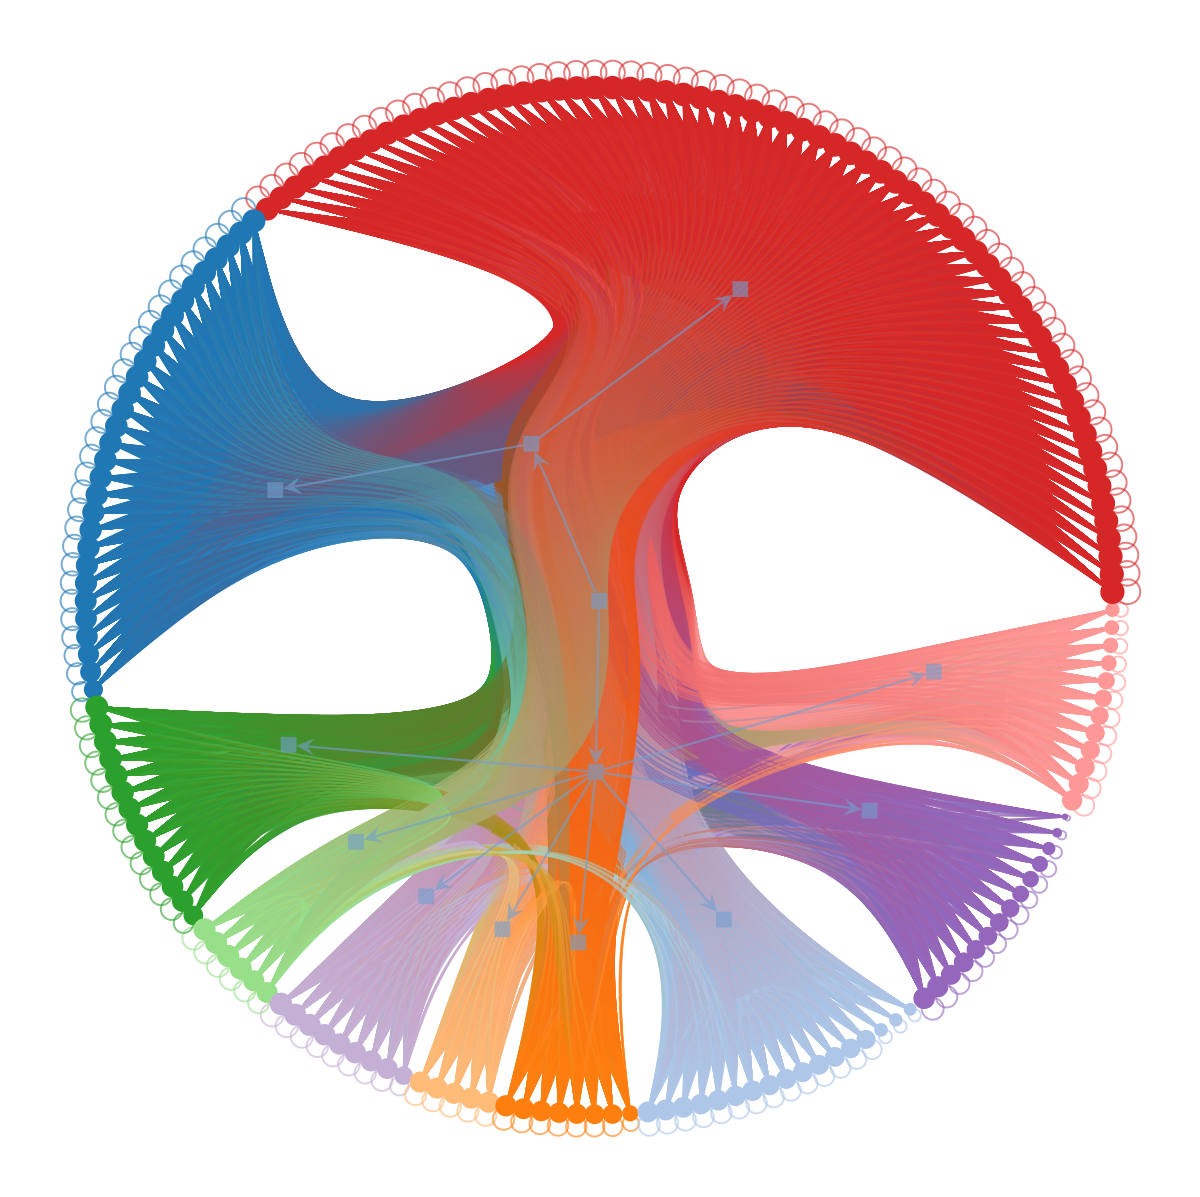

Block 31: ['Andrea Musso', 'Wolfgang Knecht', 'Eva Schernhammer', 'Rudolf Hanel', 'Diego Rybski', 'Alessandro Pluchino', 'Elma Dervić', 'Johannes Stangl', 'Johannes Stangl', 'Kavita Surana', 'Maximilian Kathofer', 'S. Thurner', 'Ronald Sladky', 'Vibeke Sørensen']
Block 29: ['Ola A. Abu Ali', 'Jula Lühring', 'Tamás S. Biró', 'Jan Bachmann', 'Stefan M. Schneider', 'James S. Bennett', 'James McNerney', 'José Moran']
Block 62: ['Hyunsik Kong', '√Ålvaro Corral', 'Ljubica Nedelkoska', 'Sándor Juhász', 'Anton Pichler', 'Steve Lansing', 'Lukas Malik', 'Francesca Tria', 'Michael Strauss', 'J. Stephen Lansing', 'Allan Hanbury', 'Rainer Stütz', 'Carlo C. Jäger', 'Daniela Schlager', 'Christoph Reuter', 'Raissa M. D’Souza', 'Peter M. A. Sloot', 'Erwin Filtz', 'Carlos Molinero', 'Frank Neffke', 'Jan O. Korbel', 'Andrew K. Ringsmuth', 'Stefan Kitzler', 'Simon David Lindner', 'Gerald Steiner', 'Ljubica Nedelkoska', 'Beate Conrady', 'Jan Hurt', 'Michaela Kaleta', 'David Cserjan', 'János Kertész', 'Clau

In [22]:
df_pairwiseDistanceCSH = pd.read_csv('/content/FileForGoogleColabBlackModeling.csv')
df_AutLabels = pd.read_csv('/content/AuthorsLables.csv')
print('original', df_pairwiseDistanceCSH.head(2))
df = df_pairwiseDistanceCSH.drop(df_pairwiseDistanceCSH.columns[0], axis=1)
#print('Modified ', df.head(2))
df.columns = df.index
Graphtype = nx.from_pandas_adjacency(df)
# Weighted adjacency matrix
A= nx.to_numpy_array(Graphtype, weight='weight')
#print(A)
N= A.shape[0]
#@author: Patrick Desrosiers and Vincent Thibeault
# Reduced weighted adjacency matrix obtained by
# randomly selecting 5% of the connections
sample_size= 18
sample = np.random.randint(N, size= sample_size)
sample= list(sample)
adj_5percent= A[np.ix_(sample, sample)]
print('Shape' , adj_5percent.shape)
# Visual representation using graph-tool
g = gt.Graph(directed=False)
g.add_edge_list(np.transpose(A.nonzero()))
state = gt.minimize_nested_blockmodel_dl(g)
#gt.draw_hierarchy(state)
state.draw()
lstate = state.levels[0]
blocks = lstate.get_blocks()

# Create a dictionary to store vertices belonging to the same block
block_groups = {}
for v in g.vertices():
    block = blocks[v]  # Get the block number for the vertex
    if block not in block_groups:
        block_groups[block] = []
    block_groups[block].append(df_AutLabels.iloc[int(v)-1,2])  # Store the vertex in its block

# Print the result
for block, vertices in block_groups.items():
    print(f"Block {block}: {vertices}")

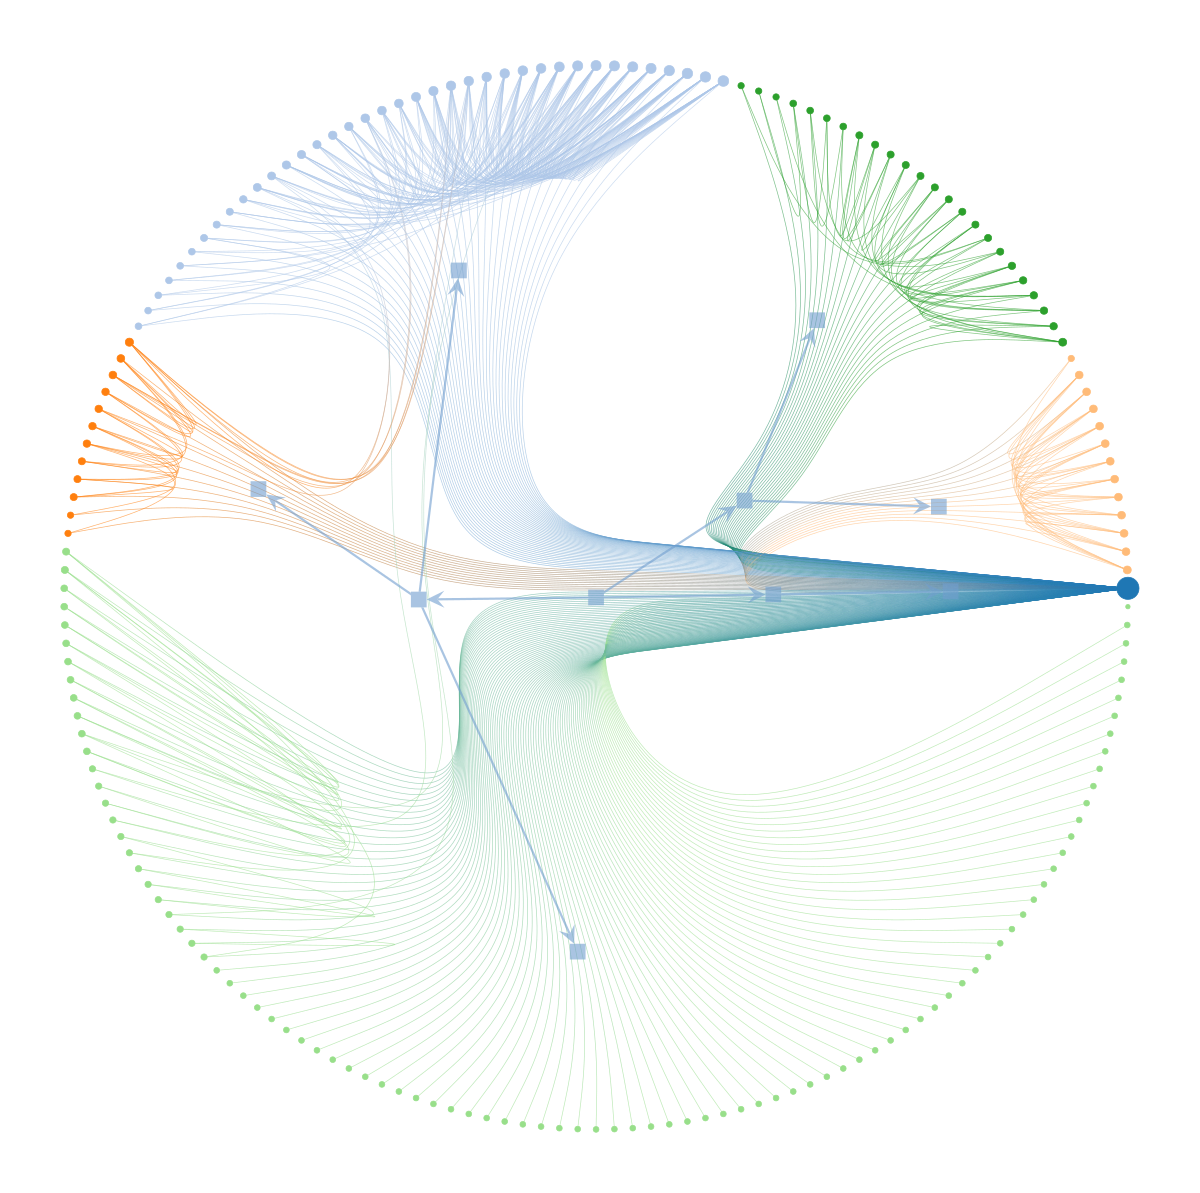

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f53a882e4d0, at 0x7f53a882dd80>,
 <GraphView object, directed, with 192 vertices and 191 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f53a882e8f0, at 0x7f535934e860>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f53a882e8f0, at 0x7f535934e9e0>, False), at 0x7f53a882e8f0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f53a882e8f0, at 0x7f535934e680>)

In [6]:
#state.draw()
state.draw()